In [ ]:
%%time
import psi4


In [ ]:
%%time
psi4.core.set_output_file('output.dat', False)

In [ ]:
%%time
psi4.set_memory('500 MB')

h2o = psi4.geometry("""
O
H 1 0.96
H 1 0.96 2 104.5
""")

psi4.energy('scf/cc-pvdz')

In [ ]:
%%time
#! Sample UHF/6-31G** CH2 Computation

R = 1.075
A = 133.93

ch2 = psi4.geometry("""
0 3
C
H 1 {0}
H 1 {0} 2 {1}
""".format(R, A)
)

psi4.set_options({'reference': 'uhf'})
psi4.energy('scf/6-31g**')

In [ ]:
%%time
psi4.set_options({'reference': 'rhf'})
psi4.optimize('scf/cc-pvdz', molecule=h2o)

In [ ]:
%%time
scf_e, scf_wfn = psi4.frequency('scf/cc-pvdz', molecule=h2o, return_wfn=True)

In [ ]:
%%time
# Example SAPT computation for ethene*ethyne (*i.e.*, ethylene*acetylene).
# Test case 16 from S22 Database

dimer = psi4.geometry("""
0 1
C   0.000000  -0.667578  -2.124659
C   0.000000   0.667578  -2.124659
H   0.923621  -1.232253  -2.126185
H  -0.923621  -1.232253  -2.126185
H  -0.923621   1.232253  -2.126185
H   0.923621   1.232253  -2.126185
--
0 1
C   0.000000   0.000000   2.900503
C   0.000000   0.000000   1.693240
H   0.000000   0.000000   0.627352
H   0.000000   0.000000   3.963929
units angstrom
""")
psi4.set_options({'scf_type': 'df',
                  'freeze_core': 'true'})

psi4.energy('sapt0/jun-cc-pvdz', molecule=dimer)

In [ ]:
%%time
#! Example potential energy surface scan and CP-correction for Ne2

ne2_geometry = """
Ne
--
Ne 1 {0}
"""

Rvals = [2.5, 3.0, 4.0]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ne2 = psi4.geometry(ne2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ne2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

In [ ]:
#code for 2 Ar atoms
%%time
ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5 , 4.0 , 4.5, 5.0, 5.5, 6.0 ]

psi4.set_options({'freeze_core': 'true'})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
energy = [0.169820,-0.122889,-0.095152 ,-0.055968,-0.032099,-0.018882]
plt.plot(Rvals,energy)
plt.xlabel('Ar-Ar Distance (Angstrom)')
plt.ylabel('Energy kcal/mol')
plt.title('Ar-Ar Interaction Energy')
plt.show()


In [ ]:
def lj(r,sigma,eps):
    return 4*eps*( (sigma/r)**12-(sigma/r)**6  )

In [ ]:
#Use scipy curve_fit to fit this curve to a lennard-jones potential with parameters sigma and eps as below
from scipy.optimize import curve_fit
popt, pcov = curve_fit(lj, Rvals, energy, p0=[3.5, 0.1])


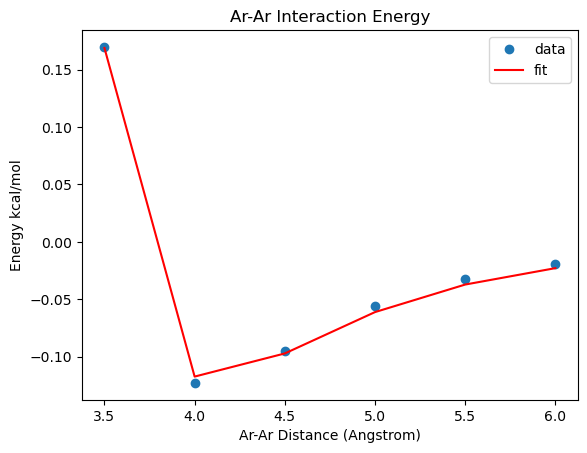

In [35]:
#Plot the fit
plt.plot(Rvals,energy,'o',label='data')
plt.plot(Rvals,lj(Rvals,*popt),'r-',label='fit')
plt.xlabel('Ar-Ar Distance (Angstrom)')
plt.ylabel('Energy kcal/mol')
plt.title('Ar-Ar Interaction Energy')
plt.legend()
plt.show()